Montar archivo y llamado de librerías

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
ruta =('/content/drive/MyDrive/Codificación de Dojo/Exámen/employee_attrition.csv')

In [5]:
df = pd.read_csv(ruta)

## Objetivo : Crear una presentación para ejecutivos de RRHH, ¿Por qué desertan los empleados?
La tabla representa los datos de los empleados

In [8]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [14]:
df.shape

(1470, 35)

## Limpieza de Datos
1. Verificar que no hayan valores perdidos en el conjunto de datos. Si los hay, trátalos de manera adecuada. Incluye una descripción breve del método que utilizaste para tratar los valores perdidos, junto con una justificación para utilizar el método.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    588 non-null    object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Puedo visualizar los siguientes detalles en la variable
- 'Años en la compañía', según el diccionario debería ser un tipo int, pero aparece como object.
- 'Género', posee 588 datos no nulos de los 1470.
Verificar datos NA

In [10]:
df.isna().sum()

Age                           0
Attrition                     0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                      882
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

*Verificando la incongruencia de la columna Género*

In [19]:
df.duplicated().sum()

0

*No hay duplicados*

In [11]:
df['Gender'].value_counts()

Female    588
Name: Gender, dtype: int64

In [15]:
##Verificaré si exite algún patrón con Female
filtro_fem_df =df['Gender']== 'Female'

filtro_fem_df

0        True
1       False
2       False
3        True
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Name: Gender, Length: 1470, dtype: bool

In [16]:
df_filtro_fem = df[filtro_fem_df]
df_filtro_fem

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
11,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,1,15,...,4,80,0,10,3,3,9,5,0,8
15,29,No,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,1,20,...,3,80,1,10,1,3,10,9,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,40,No,Travel_Rarely,1194,Research & Development,2,4,Medical,1,2051,...,2,80,3,20,2,3,5,3,0,2
1458,35,No,Travel_Rarely,287,Research & Development,1,4,Life Sciences,1,2052,...,4,80,1,4,5,3,4,3,1,1
1460,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,...,2,80,0,5,3,1,5,4,0,4
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,...,1,80,1,21,2,2,20,9,9,6


No veo algún patrón que explique la incongruencia,  y son muchos Datos, sin duplicados. Al borrar los faltantes estaría provocando un gran daño a la muestra. Por lo que decido cambiar el NA por la condición 'Otro', **de todas formas no se podrá usar la columna para efectos de análisis para deserción laboral.**

In [26]:
df['Gender'].fillna('otro',inplace = True)

In [27]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

*Verificaré la incongruencia de la columna Years in company*

In [30]:
df['YearsAtCompany'].value_counts()

5     195
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
27      2
36      2
29      2
23      2
37      1
40      1
5!      1
34      1
30      1
Name: YearsAtCompany, dtype: int64

Encontré un valor 5!. Determinaré borrarlo, puede ser error de tipeo, pero es uno de la 1470.Aplicaré método de filtrado con index

In [44]:
df_filtro1 = df[df['YearsAtCompany']=='5!'].index

In [45]:
##Elimino la fila con el método drop
df.drop(df_filtro1 , inplace=True)

In [49]:
##Verifico si existe aún el valor 5!
df['YearsAtCompany'].value_counts()

5     195
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
27      2
36      2
29      2
23      2
37      1
40      1
34      1
30      1
Name: YearsAtCompany, dtype: int64

In [50]:
##Verifico si se eliminó la fila
df.shape


(1469, 35)

2.La columna ‘EmployeeNumber’ debe ser el índice del marco de datos, no una columna adicional.

In [51]:
## Utilizaré el método set_index
df1= df.set_index('EmployeeNumber')
df1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,...,3,80,1,17,3,3,5,2,0,3
2062,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,...,1,80,1,9,5,3,7,7,1,7
2064,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,...,2,80,1,6,0,3,6,2,0,3


In [52]:
## 3. Todas las columnas deben coincidir con los tipos de datos en el diccionario de datos.
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1469 entries, 1 to 2068
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1469 non-null   int64 
 1   Attrition                 1469 non-null   object
 2   BusinessTravel            1469 non-null   object
 3   DailyRate                 1469 non-null   int64 
 4   Department                1469 non-null   object
 5   DistanceFromHome          1469 non-null   int64 
 6   Education                 1469 non-null   int64 
 7   EducationField            1469 non-null   object
 8   EmployeeCount             1469 non-null   int64 
 9   EnvironmentSatisfaction   1469 non-null   int64 
 10  Gender                    1469 non-null   object
 11  HourlyRate                1469 non-null   int64 
 12  JobInvolvement            1469 non-null   int64 
 13  JobLevel                  1469 non-null   int64 
 14  JobRole                 


Concuerda con el diccionario de Datos en el archivo de examen.

4.El próximo paso es completar un análisis basado en los datos usando Python. Esto debe incluir visualizaciones y un análisis de tendencias o cualquier otro conocimiento que puedas obtener de los datos. Debes incluir al menos 3 visualizaciones útiles y claras. Debajo de cada visualización, incluye una descripción breve de los conocimientos adquiridos a partir de esa visualización de datos.

In [53]:
df1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,...,3,80,1,17,3,3,5,2,0,3
2062,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,...,1,80,1,9,5,3,7,7,1,7
2064,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,...,2,80,1,6,0,3,6,2,0,3


In [59]:
## ¿Cuántas personas desertan del total de trabajadores?
df_desercion = df1.groupby('Attrition')['EmployeeCount'].sum()

In [60]:
df_desercion

Attrition
No     1232
Yes     237
Name: EmployeeCount, dtype: int64

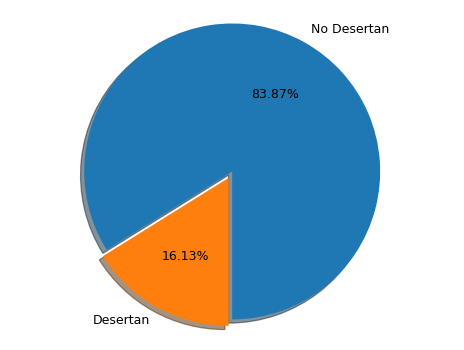

In [65]:
size = np.array([1232,237])
etiquetas = ['No Desertan','Desertan']
explotar = [0, 0.05]
fig = plt.figure(dpi=90)
ax1 = fig.add_subplot(1,1,1)
ax1.pie(size, labels=etiquetas, explode=explotar, autopct='%.2f%%', shadow = True, startangle=-90)
ax1.axis("equal")
plt.show()


Del total de trabajadores, un 16.13% deja su trabajo, contra un 83.87%.


In [91]:
df_filtro_desertores = df1[df1['Attrition']=='Yes']

In [92]:
df_filtro_desertores

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
19,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,3,...,2,80,0,6,4,3,4,2,0,3
27,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,3,...,2,80,0,10,4,3,5,3,0,3
31,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,2,...,3,80,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,23,Yes,Travel_Frequently,638,Sales,9,3,Marketing,1,4,...,1,80,1,1,3,2,1,0,1,0
2027,29,Yes,Travel_Rarely,1092,Research & Development,1,4,Medical,1,1,...,2,80,3,4,3,4,2,2,2,2
2032,56,Yes,Travel_Rarely,310,Research & Development,7,2,Technical Degree,1,4,...,4,80,1,14,4,1,10,9,9,8


Para analizar la data y responder la pregunta ¿Por qué los trabajadores desertan?. Analizaré las variables: Satisfacción Relacional vs Deserción, Satisfacción Laboral y Horas de Capacitación vs Deserción.

In [106]:
## RelationshipSatisfaction vs Deserción
satisfaccion_relacional_df= df_filtro_desertores.groupby('RelationshipSatisfaction')['EmployeeCount'].sum()
satisfaccion_relacional_df

RelationshipSatisfaction
1    57
2    45
3    71
4    64
Name: EmployeeCount, dtype: int64

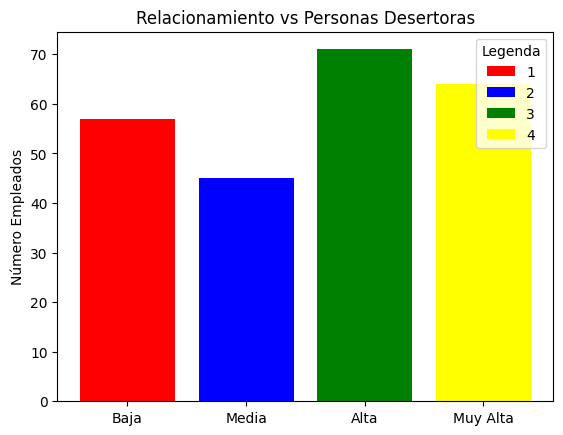

In [111]:
# ocuparé un gráfico de barras por la cualidad de la variable.
Relacionamiento = ['Baja', 'Media', 'Alta', 'Muy Alta']
Numero_de_Desertores= [57, 45, 71,64]

bar_labels = ['1', '2', '3', '4']
bar_colors = ['red', 'blue', 'green', 'yellow']

# grafico
fig, ax = plt.subplots()

ax.bar(Relacionamiento, Numero_de_Desertores, label=bar_labels, color=bar_colors)

ax.set_ylabel('Número Empleados')
ax.set_title('Relacionamiento vs Personas Desertoras')
ax.legend(title='Legenda')

plt.show()


Se puede visualizar que el relacionamiento con sus pares de trabajo no es motivo de deserción laboral.

In [109]:
##Job Satisfaction vs Deserción Laboral

satisfaccion_laboral_df= df_filtro_desertores.groupby('JobSatisfaction')['EmployeeCount'].sum()
satisfaccion_laboral_df

JobSatisfaction
1    66
2    46
3    73
4    52
Name: EmployeeCount, dtype: int64

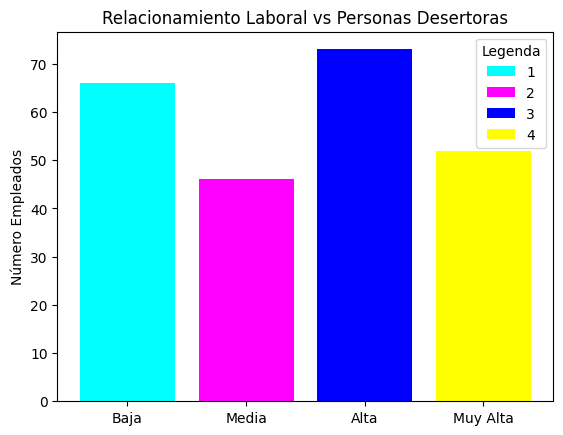

In [112]:
## ocuparé un gráfico de barras por la cualidad de la variable.
Satisfaccion_laboral = ['Baja', 'Media', 'Alta', 'Muy Alta']
Numero_de_Desertores= [66, 46, 73,52]

bar_labels = ['1', '2', '3', '4']
bar_colors = ['cyan', 'magenta', 'blue', 'yellow']

# grafico
fig, ax = plt.subplots()

ax.bar(Satisfaccion_laboral, Numero_de_Desertores, label=bar_labels, color=bar_colors)

ax.set_ylabel('Número Empleados')
ax.set_title('Relacionamiento Laboral vs Personas Desertoras')
ax.legend(title='Legenda')

plt.show()

Tanto la Satisfacción Laboral, como el relacionamiento con sus pares, no son variables que afecten la deserción de los empleados.
Ambas variables son directamente proporcionales.

Departamento vs Desercion

In [125]:
df_departamento = df_filtro_desertores.groupby('Department')['EmployeeCount'].sum()
df_departamento


Department
Human Resources            12
Research & Development    133
Sales                      92
Name: EmployeeCount, dtype: int64

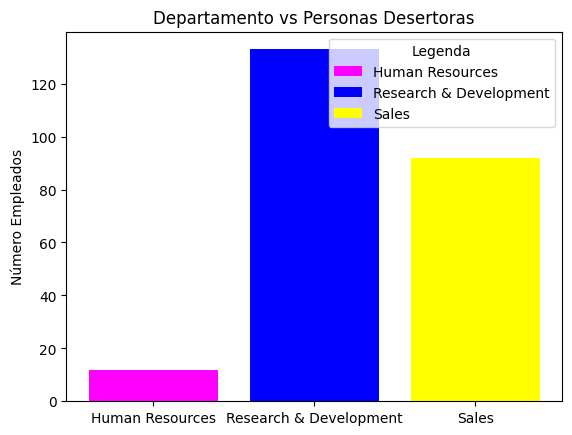

In [126]:
## ocuparé un gráfico de barras por la cualidad de la variable y Un gráfico circular
Departamento = ['Human Resources', 'Research & Development','Sales']
Numero_de_Desertores= [12,133,92]

bar_labels = ['Human Resources', 'Research & Development','Sales']
bar_colors = ['magenta', 'blue', 'yellow']

# grafico
fig, ax = plt.subplots()

ax.bar(Departamento, Numero_de_Desertores, label=bar_labels, color=bar_colors)

ax.set_ylabel('Número Empleados')
ax.set_title('Departamento vs Personas Desertoras')
ax.legend(title='Legenda')

plt.show()

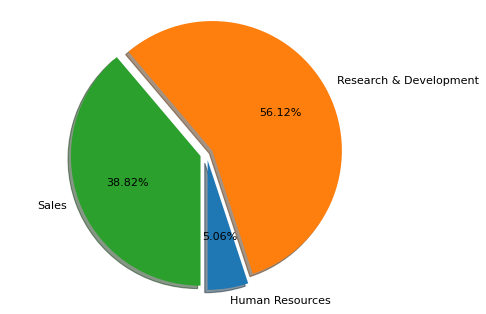

In [133]:
size = np.array([12,133,92])
etiquetas = ['Human Resources', 'Research & Development','Sales']
explotar= [0.05,0.05,0.05]
fig = plt.figure(dpi=80)
ax1 = fig.add_subplot(1,1,1)
ax1.pie(size, labels=etiquetas, explode =explotar, autopct='%.2f%%', shadow = True, startangle=-90)
ax1.axis("equal")
plt.show()

In [135]:
df_2 = df_filtro_desertores.groupby(['Department','JobSatisfaction'])['EmployeeCount'].sum()

In [136]:
## Comprobar relacion enambiente laboral de los departamentos
df_2

Department              JobSatisfaction
Human Resources         1                   5
                        2                   2
                        3                   3
                        4                   2
Research & Development  1                  38
                        2                  24
                        3                  43
                        4                  28
Sales                   1                  23
                        2                  20
                        3                  27
                        4                  22
Name: EmployeeCount, dtype: int64

Aunque el ámbiente laboral no parece ser una variable significativa, se aprecia que la fuga de los empleados pertenece mayoritariamente al departamento de Investigación y Desarrollo. Si bien las variables Job Satisfaction y Número de Empleados estan en proporción directa, no se puede concluir, ya que los que clasificaron como 'Alta' su satisfacción fue el grupo que más renunció, por lo que no da una respuesta lógica para tal comportamiento.
  

```
# Tiene formato de código
```

